# Project Name: Air Quality CO  Predictor and Temperature Forecast


## Aim :
### In this project we will be building our CO Predictor and Temperature forcast with the help of Machine Learning Models 

## Source :
### This data was taken from Kaggle (https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set) 

## Time Line of the Project:

- Data Analysis
- Fearure Engineering
- Model Building and Prediction using ML models
- Temperature prediction with LSTM

### Importing Libraries:

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
import pickle

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow import keras
from tensorflow import nn
import statsmodels.api as sm


%matplotlib inline

### Reading our Data Set

In [4]:
df= pd.read_csv("./AirQuality.csv", delimiter=';')

In [5]:
df.head()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578          NaN          NaN  
1  0,7255          NaN          NaN  
2  0,7502          NaN          NaN  
3  0,7867          NaN          NaN  
4  0,7888          NaN          NaN

## Understanding our Data

### Let us understand what these abbreviations stand for :
- Date (DD/MM/YYYY)
- Time (HH.MM.SS)
- True hourly averaged concentration CO in mg/m^3 (reference analyzer)
- PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
- True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
- True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
- PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
- True hourly averaged NOx concentration in ppb (reference analyzer)
- PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
- True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
- PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
- PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
- Temperature in Â°C
- Relative Humidity (%)
- AH Absolute Humidity

### Acknowledgements
Saverio De Vito (saverio.devito '@' enea.it), ENEA - National Agency for New Technologies, Energy and Sustainable Economic Development

### Citation Request
S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario, Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005.
(https://www.sciencedirect.com/science/article/abs/pii/S0925400507007691)

### Checking Null Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [9]:
df=df.drop(columns = ['Unnamed: 15','Unnamed: 16'])

In [21]:
df=df.dropna()
df.head()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  
0  0,7578  
1  0,7255  
2  0,7502  
3  0,7867  
4  0,7888

In [28]:
#Formatting object columns from strings to floats
obj_columns = ['CO(GT)','C6H6(GT)', 'T', 'RH', 'AH']
df.replace(to_replace=',',value='.',regex=True,inplace=True) 

for i in obj_columns:
    df[i] = pd.to_numeric(df[i],errors='coerce') 

In [44]:
# Dealing with -200 representing error or missing recordings
df[df == -200].count()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

#### We focus on the prediction of PT08.S1 (CO) hourly averaged sensor response (nominally CO targeted)
*For CO(GT) prediction, the index for the 1683 -200 values has to be excluded from the model training or a very simple approach would be to copy the observation from the same time the day before.*



#### fill missing values with a value at the same time one day ago
---
def fill_missing(values):
	one_day = 60 * 24
	for row in range(values.shape[0]):
		for col in range(values.shape[1]):
			if isnan(values[row, col]):
				values[row, col] = values[row - one_day, col]

--- 
#### fill missing

---
fill_missing(dataset.values)

---

In [49]:
df = df.drop(columns = 'NMHC(GT)','CO(GT)','NOx(GT)', 'NO2(GT)')
df.head()

Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0  10/03/2004  18.00.00       1360.0      11.9         1046.0        1056.0   
1  10/03/2004  19.00.00       1292.0       9.4          955.0        1174.0   
2  10/03/2004  20.00.00       1402.0       9.0          939.0        1140.0   
3  10/03/2004  21.00.00       1376.0       9.2          948.0        1092.0   
4  10/03/2004  22.00.00       1272.0       6.5          836.0        1205.0   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1692.0       1268.0  13.6  48.9  0.7578  
1        1559.0        972.0  13.3  47.7  0.7255  
2        1555.0       1074.0  11.9  54.0  0.7502  
3        1584.0       1203.0  11.0  60.0  0.7867  
4        1490.0       1110.0  11.2  59.6  0.7888

In [209]:
ddf = df.drop(index = df[df['T'] == -200].index)

In [74]:
ddf.describe()

PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  \
count  8991.000000  8991.000000    8991.000000   8991.000000   8991.000000   
mean   1099.833166    10.083105     939.153376    835.493605   1456.264598   
std     217.080037     7.449820     266.831429    256.817320    346.206794   
min     647.000000     0.100000     383.000000    322.000000    551.000000   
25%     937.000000     4.400000     734.500000    658.000000   1227.000000   
50%    1063.000000     8.200000     909.000000    806.000000   1463.000000   
75%    1231.000000    14.000000    1116.000000    969.500000   1674.000000   
max    2040.000000    63.700000    2214.000000   2683.000000   2775.000000   

       PT08.S5(O3)            T           RH           AH  
count  8991.000000  8991.000000  8991.000000  8991.000000  
mean   1022.906128    18.317829    49.234201     1.025530  
std     398.484288     8.832116    17.316892     0.403813  
min     221.000000    -1.900000     9.200000     0.184700  
25%     731.500000    11.800000    35.800000     0.736800  
50%     963.000000    17.800000    49.600000     0.995400  
75%    1273.500000    24.400000    62.500000     1.313700  
max    2523.000000    44.600000    88.700000     2.231000

#### Observing the PT08.S1(CO) density distribution
Now that we are done with quick data cleaning, we'll focus on visualization and trasnsfromation.

C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PT08.S1(CO)', ylabel='Density'>

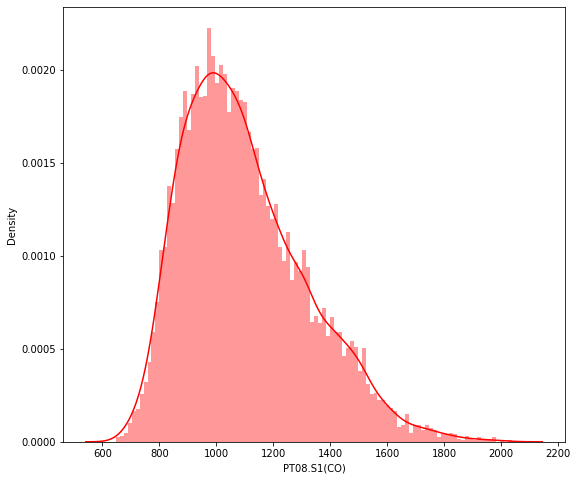

In [52]:
plt.figure(figsize=(9, 8))
sns.distplot(ddf['PT08.S1(CO)'], color='r', bins=100, hist_kws={'alpha': 0.4})

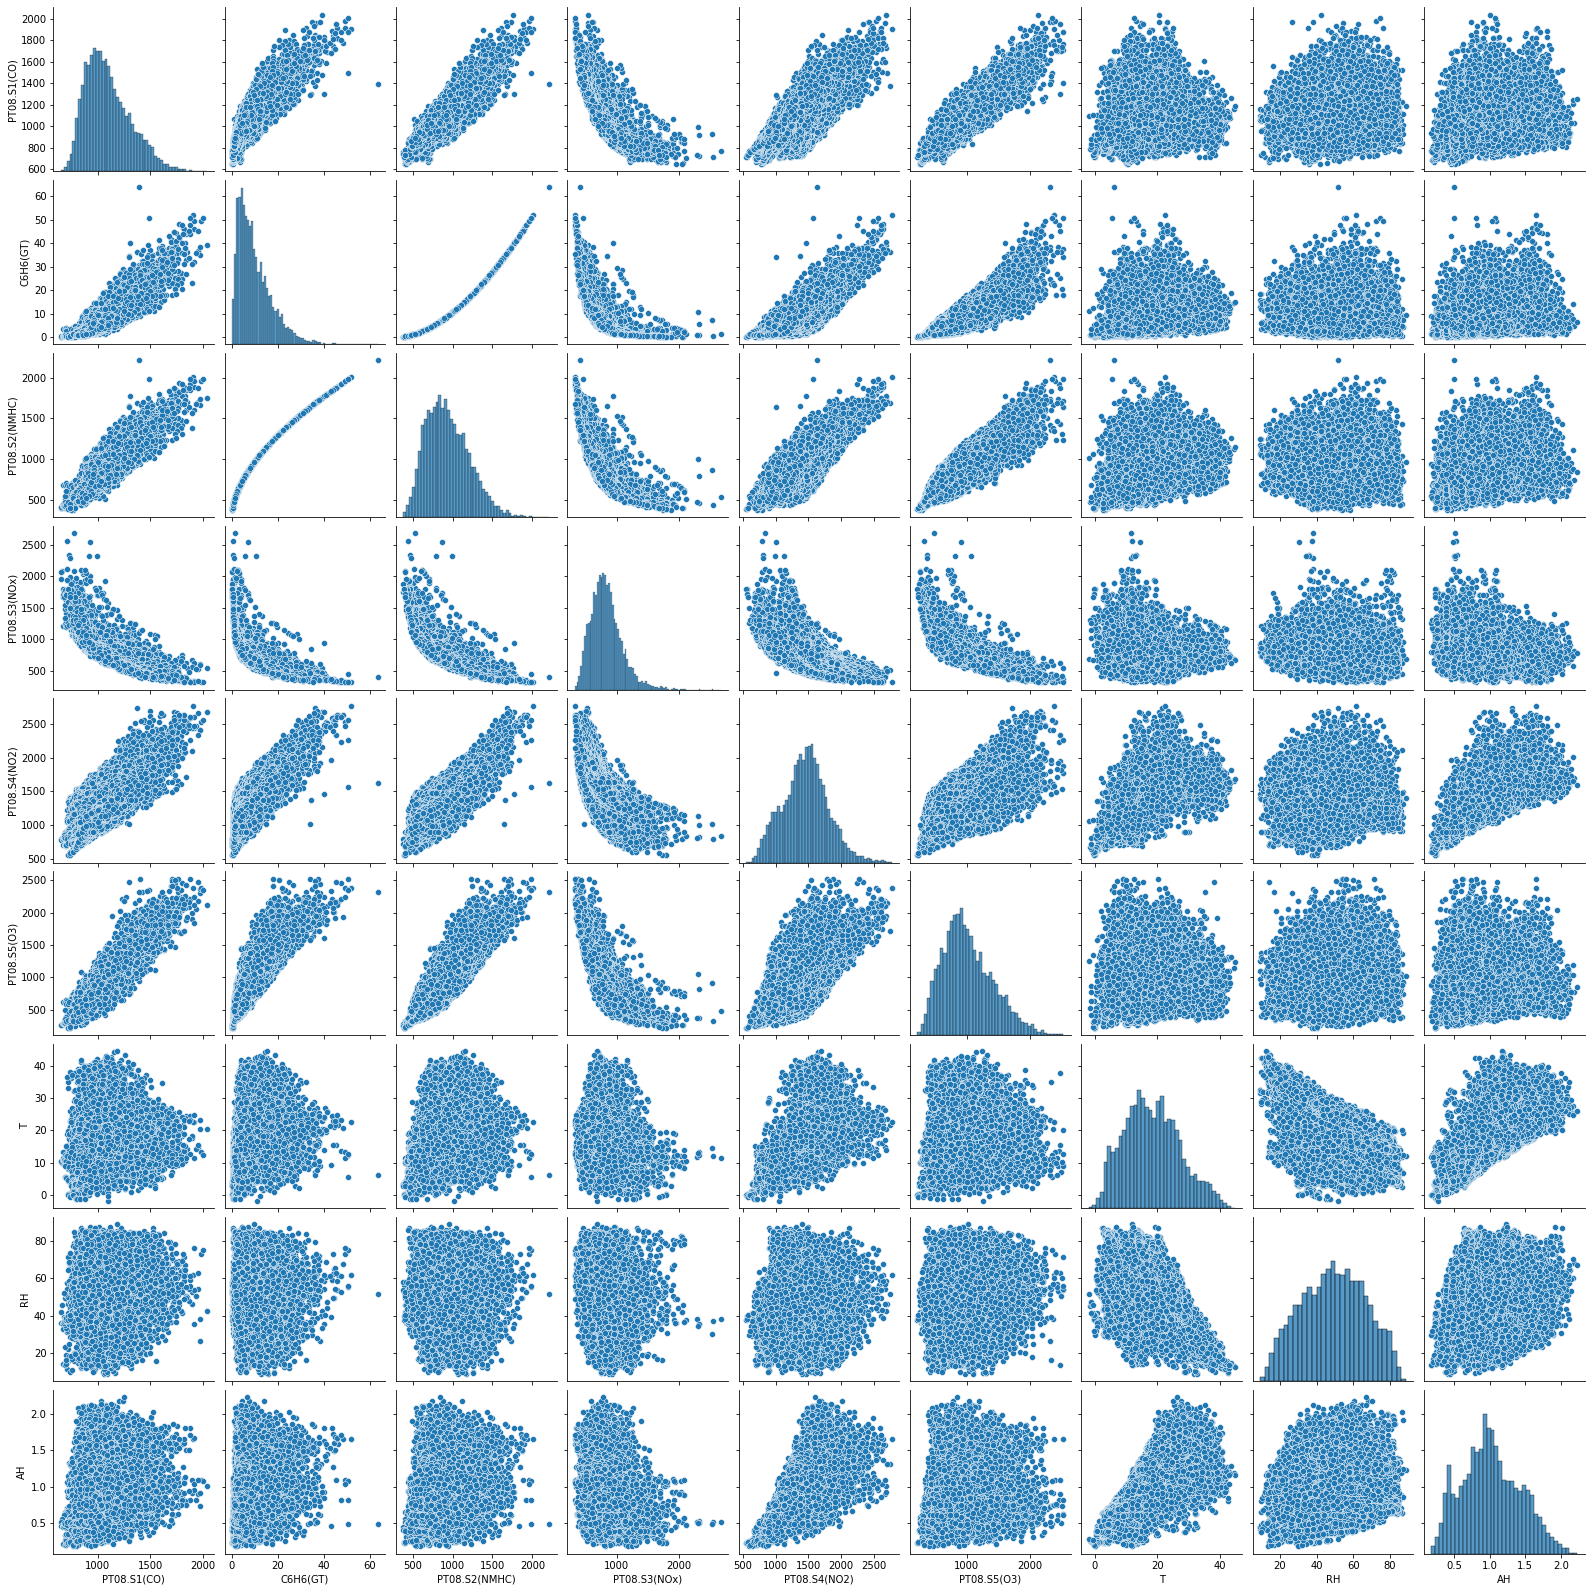

In [62]:
sns.pairplot(ddf)

#### Plotting a Heat Map

In [63]:
relation= ddf.corr()

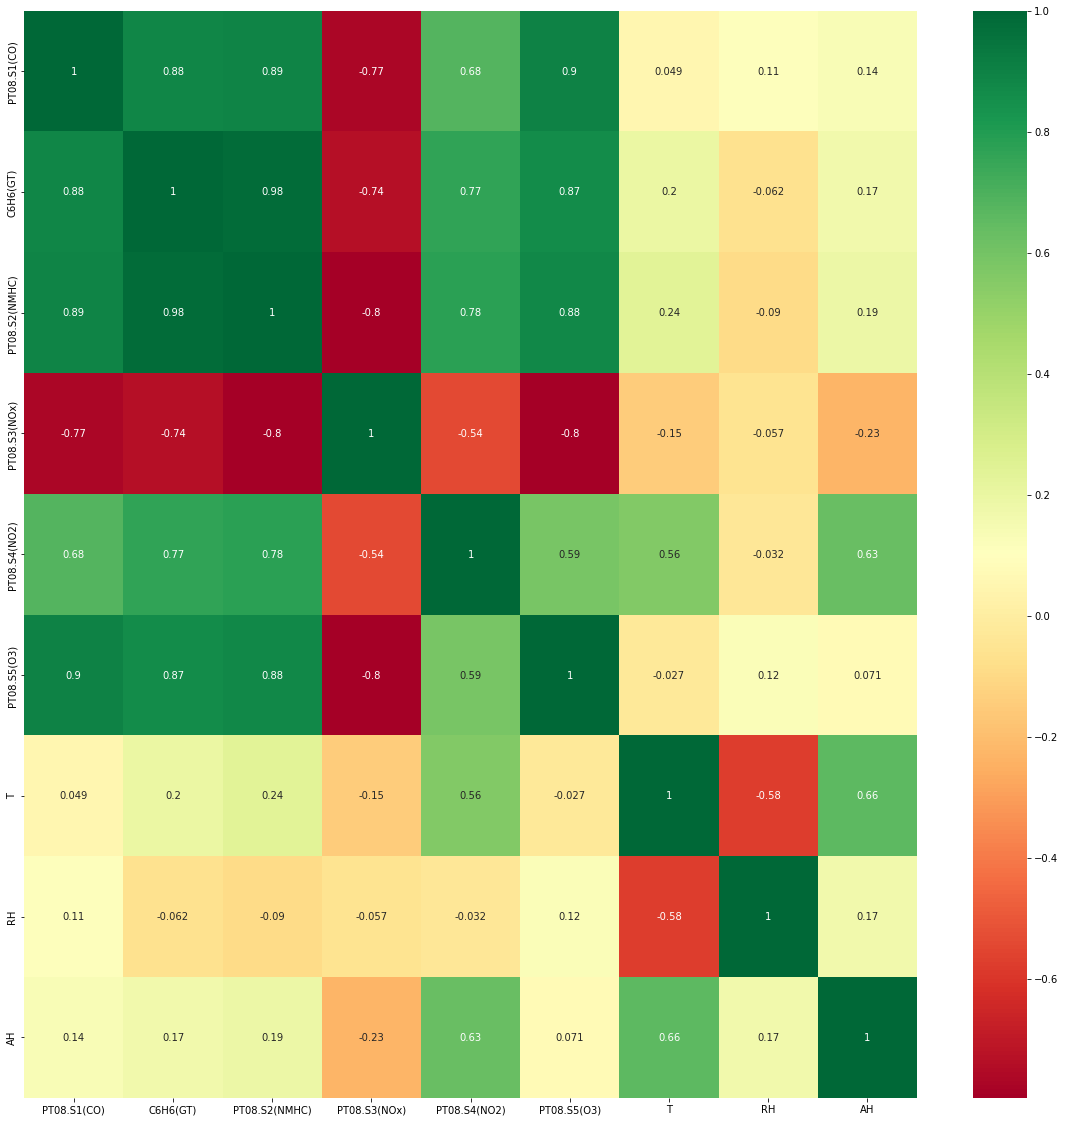

In [64]:
top_corr_features = relation.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(ddf[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Plotting s Q-Q Plot

In [69]:
col= ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

In [157]:
def plot_curve(ddf,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,3,1)
    ddf[feature].hist()
    plt.subplot(1,3,2)
    stat.probplot(ddf[feature],dist='norm',plot=pylab)
    plt.subplot(1,3,3)
    sns.boxplot(ddf[feature],color='red')
    plt.title(feature)
    plt.show()

C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


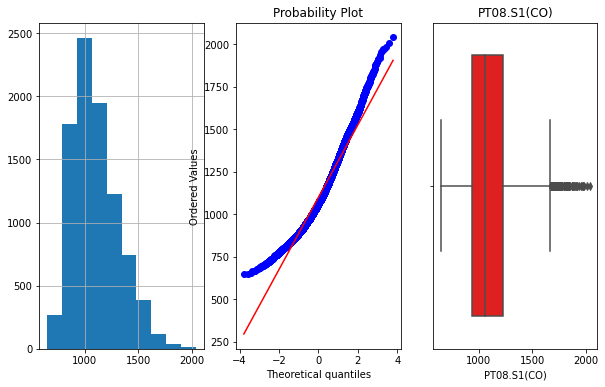

C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


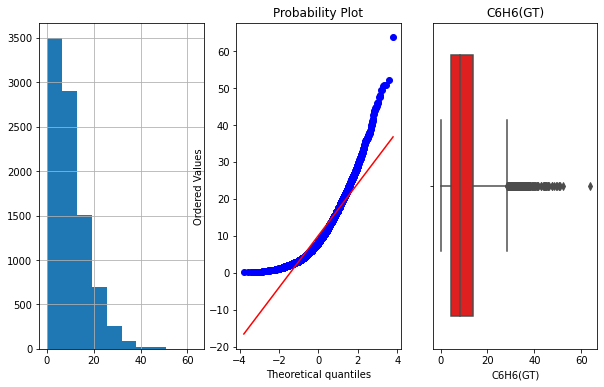

C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


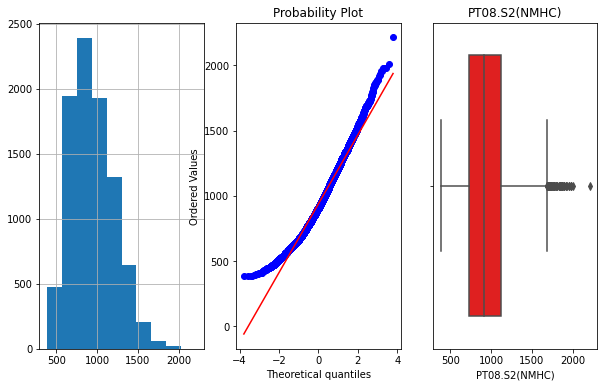

C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


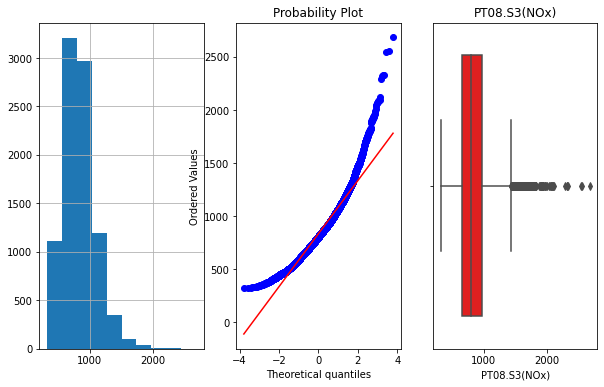

C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


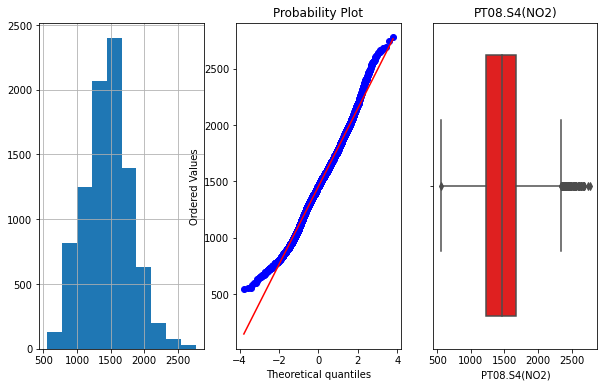

C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


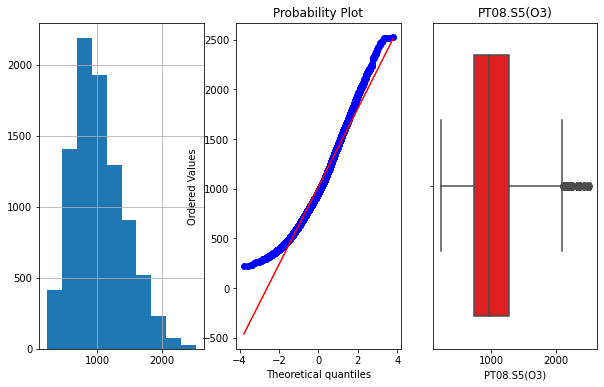

C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


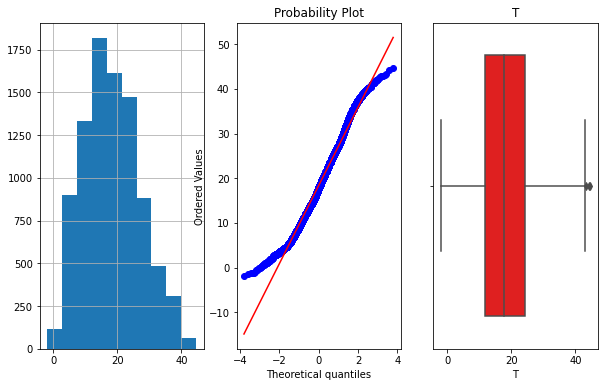

C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


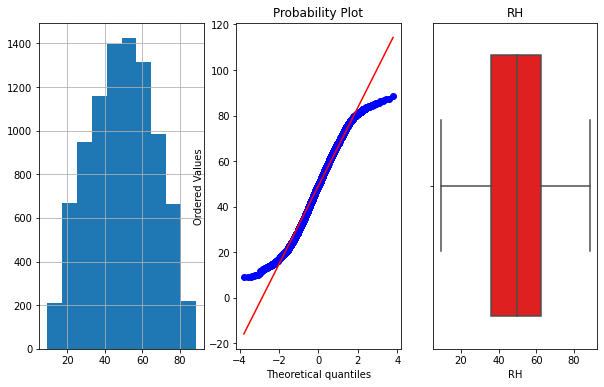

C:\Users\busola\Desktop\771768\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


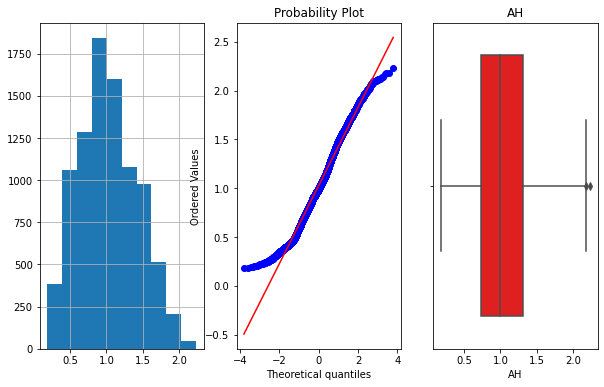

In [76]:
for i in col:
    plot_curve(ddf,i)

#### Divide our Data Set in Dependent and Independent variable to observe the important features

In [86]:
features= ['C6H6(GT)', 'PT08.S2(NMHC)',
       'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

In [90]:
x=ddf[features] ## independent features
y=ddf['PT08.S1(CO)'] ## dependent features

In [91]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [92]:
print(model.feature_importances_)

[0.2154638  0.2446402  0.13343478 0.05346628 0.29213773 0.02112988
 0.02162121 0.01810612]


#### Plot graph of feature importances for better visualization

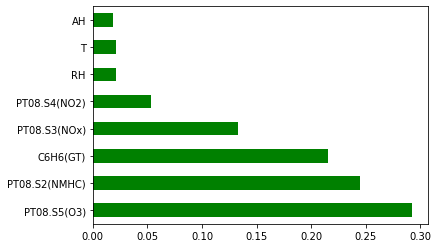

In [94]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh',color='green')
plt.show()

#### TIme Series Analysis

In [210]:
t = []
for i in range(len(ddf)):
  date = ddf.iloc[i][0].split('/')
  t.append(date[-1] + '-'+date[1] + '-'+  date[0] +' '+ ':'.join(ddf.iloc[i][1].split('.'))) 
ddf['DateTime'] = t
#ddf.drop(['Date','Time'],axis = 1,inplace = True)
#df = df[['DateTime','CO','Temp']]

In [211]:
ddf.head()

Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0  10/03/2004  18.00.00       1360.0      11.9         1046.0        1056.0   
1  10/03/2004  19.00.00       1292.0       9.4          955.0        1174.0   
2  10/03/2004  20.00.00       1402.0       9.0          939.0        1140.0   
3  10/03/2004  21.00.00       1376.0       9.2          948.0        1092.0   
4  10/03/2004  22.00.00       1272.0       6.5          836.0        1205.0   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH             DateTime  
0        1692.0       1268.0  13.6  48.9  0.7578  2004-03-10 18:00:00  
1        1559.0        972.0  13.3  47.7  0.7255  2004-03-10 19:00:00  
2        1555.0       1074.0  11.9  54.0  0.7502  2004-03-10 20:00:00  
3        1584.0       1203.0  11.0  60.0  0.7867  2004-03-10 21:00:00  
4        1490.0       1110.0  11.2  59.6  0.7888  2004-03-10 22:00:00

In [212]:
def date_cols(ddf):
    """
    Function to transform the date column in a datetime-dtype and to create the columns year, month and day.
    """
    ddf = ddf.copy()
    ddf["DateTime"] = pd.to_datetime(ddf["DateTime"])
    ddf["month"] = ddf["DateTime"].dt.month 
    ddf["day"] = ddf["DateTime"].dt.dayofyear    # alternativ: day
    ddf["hour"] = ddf["DateTime"].dt.hour
    ddf.set_index("DateTime", inplace = True, drop = True) # Set the data as index
    ddf.drop(columns = "Time", inplace = True) # Set the data as index
    return ddf

In [213]:
ddf = date_cols(ddf)
ddf.head()

Date  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
DateTime                                                                
2004-03-10 18:00:00  10/03/2004       1360.0      11.9         1046.0   
2004-03-10 19:00:00  10/03/2004       1292.0       9.4          955.0   
2004-03-10 20:00:00  10/03/2004       1402.0       9.0          939.0   
2004-03-10 21:00:00  10/03/2004       1376.0       9.2          948.0   
2004-03-10 22:00:00  10/03/2004       1272.0       6.5          836.0   

                     PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
DateTime                                                                   
2004-03-10 18:00:00        1056.0        1692.0       1268.0  13.6  48.9   
2004-03-10 19:00:00        1174.0        1559.0        972.0  13.3  47.7   
2004-03-10 20:00:00        1140.0        1555.0       1074.0  11.9  54.0   
2004-03-10 21:00:00        1092.0        1584.0       1203.0  11.0  60.0   
2004-03-10 22:00:00        1205.0        1490.0       1110.0  11.2  59.6   

                         AH  month  day  hour  
DateTime                                       
2004-03-10 18:00:00  0.7578      3   70    18  
2004-03-10 19:00:00  0.7255      3   70    19  
2004-03-10 20:00:00  0.7502      3   70    20  
2004-03-10 21:00:00  0.7867      3   70    21  
2004-03-10 22:00:00  0.7888      3   70    22

#### PT08.S1(CO)

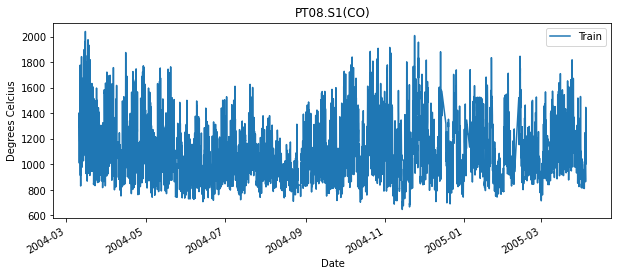

In [185]:
ddf['PT08.S1(CO)'].plot(figsize=(10,4), label='Train')
plt.xlabel("Date")
plt.ylabel("Degrees Celcius");
plt.title('PT08.S1(CO)')
plt.legend()
plt.show()

#### Identifying trends

In [165]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

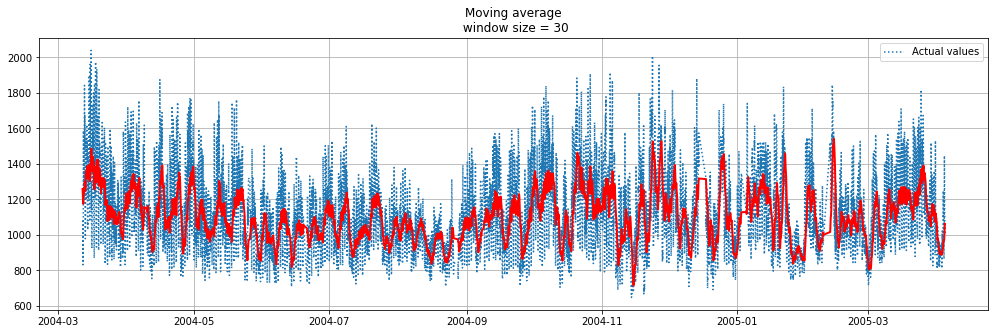

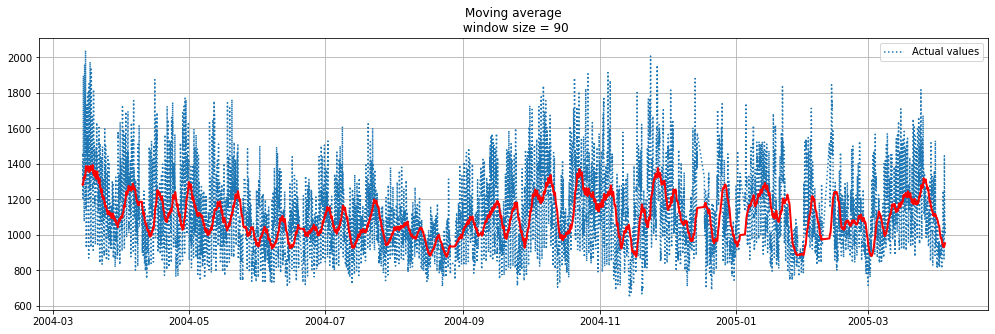

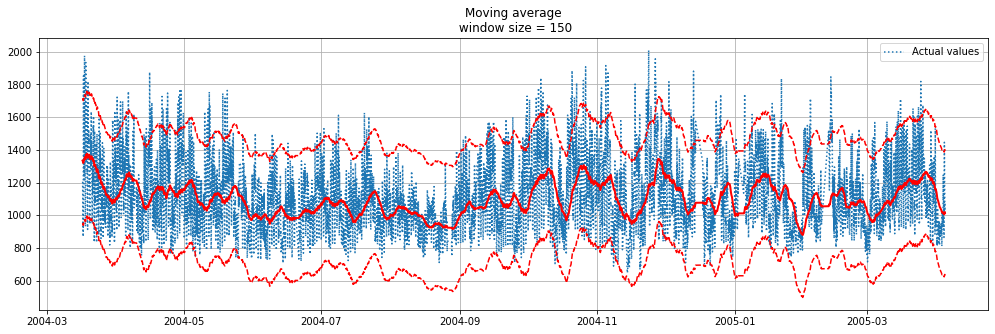

In [180]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.06):

    plt.figure(figsize=(17,5))
    plt.plot(series[window:],':' ,label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
    rolling_mean = series.rolling(window=window).mean()
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'r', linewidth = 2, label='Rolling mean trend', )
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
   
    
#Smooth by the previous month (30 days)
plot_moving_average(ddf['PT08.S1(CO)'], 30)

#Smooth by the previous quarter (90 days)
plot_moving_average(ddf['PT08.S1(CO)'], 90)

#Smooth by previous 300 days
plot_moving_average(ddf['PT08.S1(CO)'], 150,plot_intervals=True)

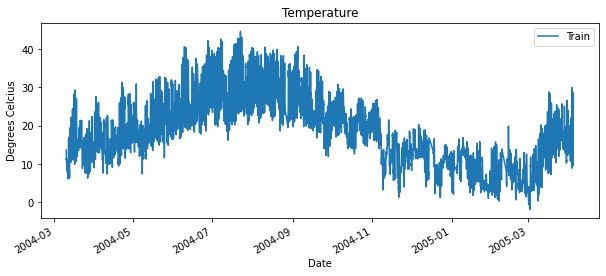

In [184]:
ddf['T'].plot(figsize=(10,4), label='Train')
plt.xlabel("Date")
plt.ylabel("Degrees Celcius");
plt.title('Temperature')
plt.legend()
plt.show()

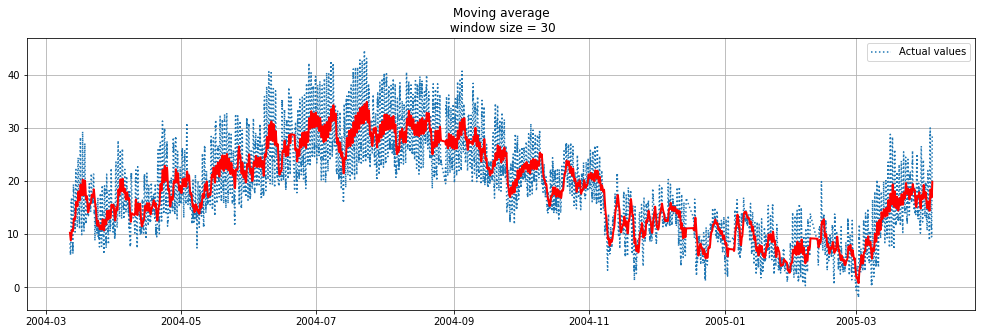

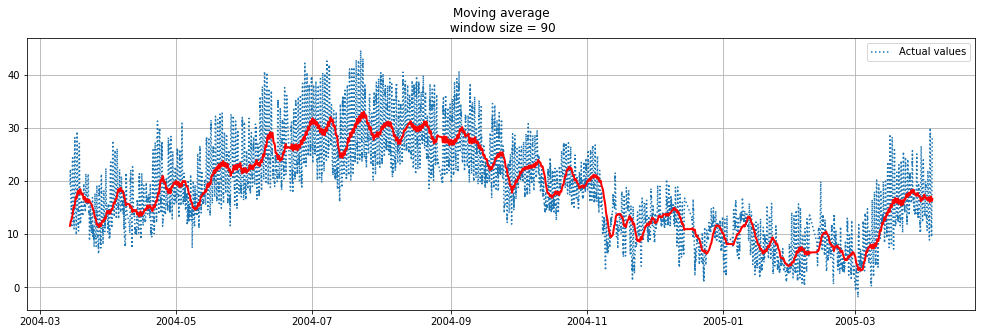

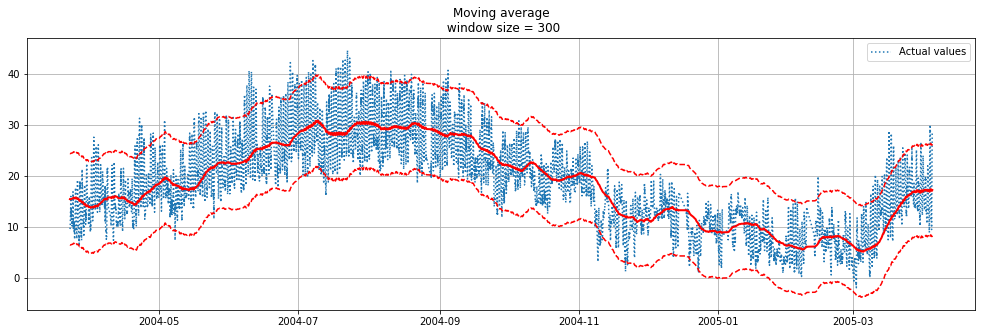

In [183]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.06):

    plt.figure(figsize=(17,5))
    plt.plot(series[window:],':' ,label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
    rolling_mean = series.rolling(window=window).mean()
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'r', linewidth = 2, label='Rolling mean trend', )
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
   
    
#Smooth by the previous month (30 days)
plot_moving_average(ddf['T'], 30)

#Smooth by the previous quarter (90 days)
plot_moving_average(ddf['T'], 90)

#Smooth by previous 300 days
plot_moving_average(ddf['T'], 300,plot_intervals=True)

##### In this project, we will use the data to explore a very specific question; that is: Given recent record, what is the expected average daily temperature for the week ahead?

In [237]:
# resample minute data to mean for each day
# resample data to daily
def re_sample(ddf):
    df_hour=ddf.groupby("Date").mean()
    df_hour.index = pd.to_datetime(df_hour.index)
    df_hour =  df_hour.sort_index(ascending=True)
    return df_hour
# summarize
df_hour =  re_sample(ddf)
print(df_hour.shape)
# save
#df_hour.to_csv('data_from_hours_2days.csv')


df_hour.head()

(383, 12)


PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  \
Date                                                                            
2004-01-04  1244.380952  11.971429    1010.428571    880.666667   1644.380952   
2004-01-05  1097.500000   8.662500     913.708333    918.083333   1640.416667   
2004-01-06  1135.583333  12.375000    1021.875000    896.791667   1881.500000   
2004-01-07  1130.583333  12.225000    1038.541667    740.916667   1854.250000   
2004-01-08   974.166667   5.808333     792.583333    880.083333   1559.000000   

            PT08.S5(O3)          T         RH        AH  month    day  hour  
Date                                                                         
2004-01-04  1155.857143  15.519048  51.133333  0.854881    4.0   92.0  11.0  
2004-01-05   904.625000  20.150000  52.183333  1.167312    5.0  122.0  11.5  
2004-01-06  1066.958333  20.325000  66.154167  1.533350    6.0  153.0  11.5  
2004-01-07  1059.625000  30.450000  39.691667  1.624108    7.0  183.0  11.5  
2004-01-08   670.583333  30.654167  42.120833  1.673521    8.0  214.0  11.5

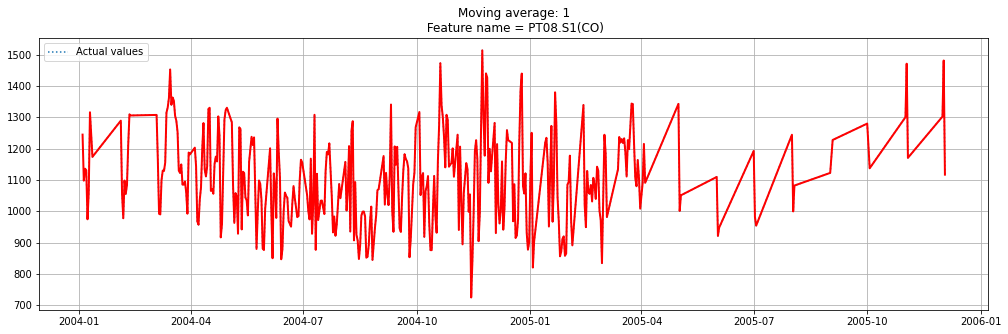

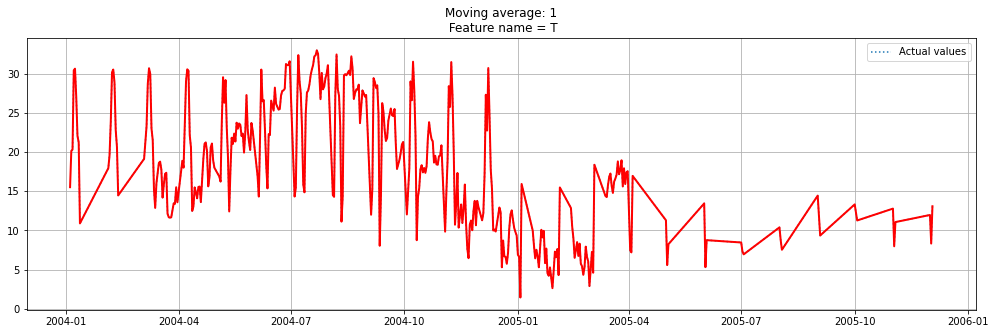

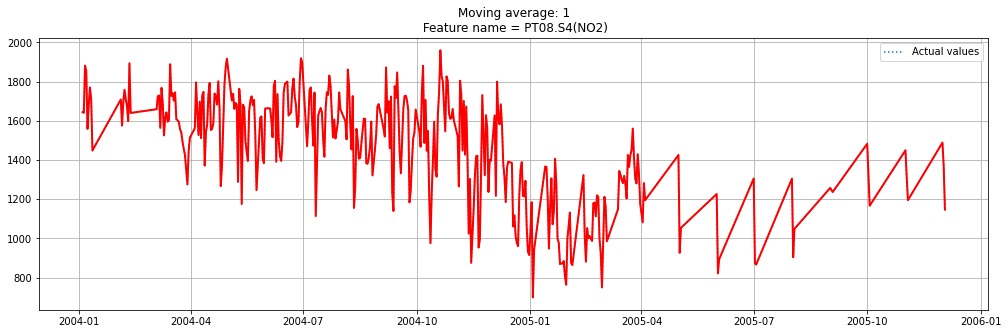

In [233]:
def plot_moving_average(colm, window, plot_intervals=False, scale=1.06):
    series = df_hour[colm]
    plt.figure(figsize=(17,5))
    plt.plot(series[window:],':' ,label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
    rolling_mean = series.rolling(window=window).mean()
    plt.title('Moving average: 1\n Feature name = {}'.format(colm))
    plt.plot(rolling_mean, 'r', linewidth = 2, label='Rolling mean trend', )
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
   
    
#Smooth by the previous daily 
plot_moving_average('PT08.S1(CO)', 1)

#Smooth by the previous daily
plot_moving_average('T', 1)

#Smooth by the previous daily
plot_moving_average('PT08.S4(NO2)', 1)

###### Based on the CO and Temperature plots, the time frame to be used for Temperature forcast would be 2004-04 to 2005-04. 
##### First, lets carryout the CO prediction Using XBoost.

In [234]:
FEATURES1 = ['C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'month', 'day', 'hour']
TARGET1 = ['PT08.S1(CO)']

FEATURES2 = ["x_pred_xgb",'PT08.S4(NO2)', 
             "T", 'RH', 'AH', 'month', 'day']
TARGET2= ["T"]

In [236]:
X = ddf[FEATURES1]
Y = ddf[TARGET1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(7192, 8) (1799, 8)


In [239]:
xgbr = xgb.XGBRegressor()

params_grid = {
    "n_estimators": [50, 100, 300]
    ,"max_depth": np.arange(2, 30, 5)
    ,"gamma": [0, 1, 5]
    ,"lambda": [1, 3, 5, 7]
    ,"learning_rate": [0.001, .01, .1, .3]
}

gridcv = GridSearchCV(
    xgbr,
    param_grid = params_grid
)

In [240]:
gridcv.fit(
    X_train,
    Y_train
)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_esti...s=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                            

In [241]:
gridcv.best_params_

{'gamma': 1,
 'lambda': 5,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 300}

In [242]:
y_pred_xgb = gridcv.predict(X_test)

In [247]:
Y_test.shape

(1799, 1)

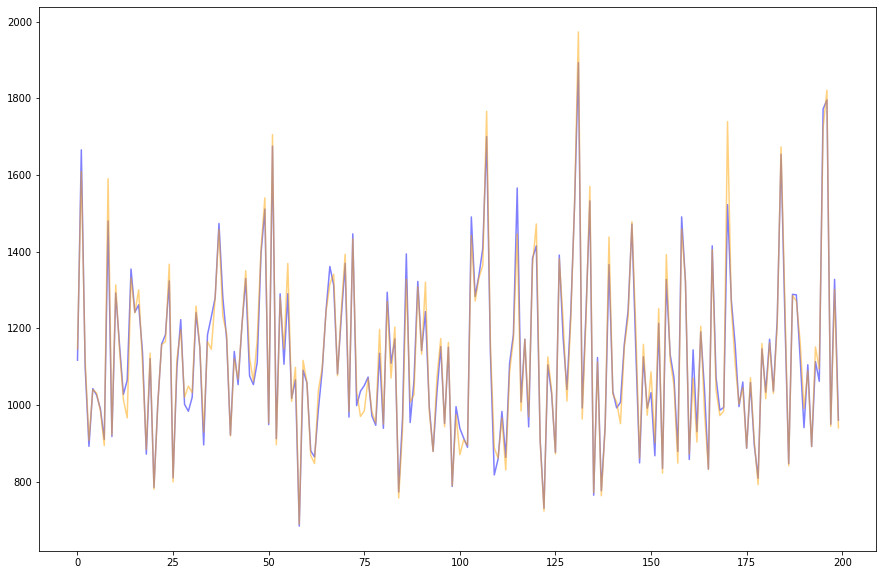

In [254]:
fig, ax = plt.subplots(1, figsize = (15, 10))

ax.plot(range(200), y_pred_xgb[:200], color = "blue", label = "predicted_xgb", alpha = .5)
ax.plot(range(200), Y_test[:200], color = "orange", label = "true", alpha = .5)

plt.show()

In [249]:
scores = gridcv.score(X_test, Y_test)
print(f'Accuracy in percentage {scores*100:.2f}')

Accuracy in percentage 97.74


In [250]:
ddf["x_pred_xgb"] = gridcv.predict(X)

### Temperature forecast with LSTM

In [255]:
pred_hour =  re_sample(ddf)

In [258]:
pred_hour = pred_hour[(pred_hour.index > '2004-4-1') & (pred_hour.index < '2005-4-1')]

In [262]:
X = pred_hour[FEATURES2]
Y = pred_hour[TARGET2]
X.shape

(312, 7)

In [263]:
# univariate multi-step lstm
from math import sqrt
from numpy import split
from numpy import array
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM

In [404]:
# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data.iloc[5:271,:], data.iloc[271:-6,:]
    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test
 
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores
 
# summarize scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))
 
 # convert history into inputs and outputs
def to_supervised(train, Y_train, n_input, n_out=7):
    # flatten data
    data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
    Y_data = Y_train.reshape((Y_train.shape[0]*Y_train.shape[1], Y_train.shape[2]))
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
        # define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        # ensure we have enough data for this instance
        if out_end <= len(data):
            x_input = data[in_start:in_end, :]
            y_input = Y_data[in_start:in_end, 0]
            
            x_input = x_input.reshape((len(x_input), train.shape[2]))
            X.append(x_input)
            y.append(y_input)
        # move along one time step
        in_start += 1
    return array(X), array(y)
 
# train the model
def build_model(train, Y_train, n_input):
    # prepare data
    train_x, train_y = to_supervised(train, Y_train, n_input)
    # define parameters
    verbose, epochs, batch_size = 0, 150, 16
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    # define model
    model = Sequential()
    model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse', optimizer='adam')
    # fit network
    model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model
 
# make a forecast
def forecast(model, history, n_input):
    # flatten data
    data = array(history)
    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
    # retrieve last observations for input data
    input_x = data[-n_input:, :]
    # reshape into [1, n_input, 1]
    input_x = input_x.reshape((1, len(input_x), 7)) #Use number 0f features 7
    # forecast the next week
    yhat = model.predict(input_x, verbose=0)
    # we only want the vector forecast
    yhat = yhat[0]
    return yhat

# evaluate a single model
def evaluate_model(train, test, Y_train, Y_test, n_input):
    # fit model
    model = build_model(train, Y_train, n_input)
    # history is a list of weekly data
    history = [x for x in train]
    # walk-forward validation over each week
    predictions = list()
    for i in range(len(test)):
        # predict the week
        yhat_sequence = forecast(model, history, n_input)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next week
        history.append(test[i, :])
    # evaluate predictions days for each week
    predictions = array(predictions)
    score, scores = evaluate_forecasts(Y_test[:, :, 0], predictions)
    return score, scores, model
 

In [405]:
# split into train and test for X
X_train, X_test = split_dataset(X)

# split into train and test for Y
Y_train, Y_test = split_dataset(Y)

In [406]:
X_train.shape, X_test.shape

((38, 7, 7), (5, 7, 7))

lstm: [8.462] 9.6, 5.7, 6.0, 9.9, 9.8, 8.9, 8.4


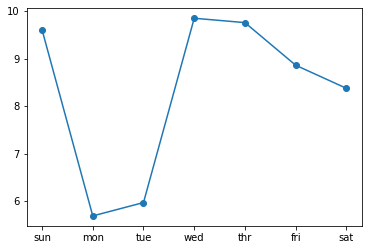

In [407]:
# evaluate model and get scores
n_input = 14
score, scores, model = evaluate_model(X_train, X_test, Y_train, Y_test, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()

In [408]:
scored = np.array(scores)+ score

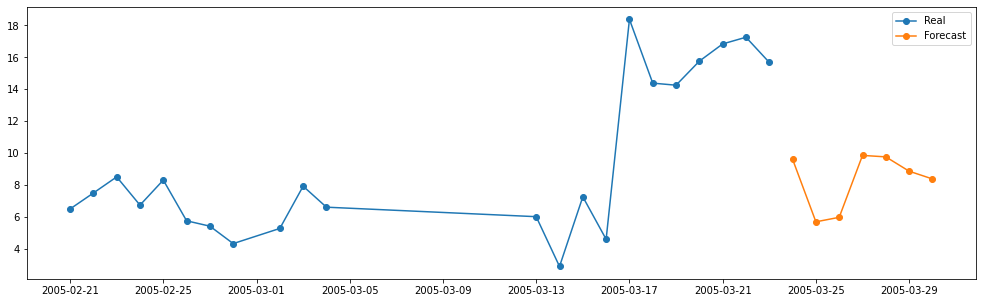

In [425]:
plt.figure(figsize=(17,5))
plt.plot(X.index[-30:-8], Y[-35:-13], marker='o', label='Real')
plt.plot(X.index[-8:-1], scores, marker='o', label='Forecast')
plt.legend()
plt.show()

#### We will use our best performing model for XGB Regressor and LSTM

In [264]:
# open a file, where you ant to store the data
file = open('aqi_XGBreg_model.pkl', 'wb')

# dump information to that file
pickle.dump(xgr, file)

In [112]:
xgr

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=30, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [422]:
# open a file, where you ant to store the data
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

##### For further look into LSTM:
https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/